# SONAR_USE_CASE-PROJECT

Data Description

The task is to train a network to discriminate b/w sonar signals bounced off a metal cylinder and those bounced off a roughly cylinder rock. The dataset contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each pattern represents the energy within a particular frequency band, integrated over a certain period of time.

Target

Our Traget variable is "Class" which contains two classes as given below:
    1.) Rock
    2.) Mines

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the DataSet

import pandas as pd

In [3]:
df = pd.read_csv("Sonar.csv")

In [4]:
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
12,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,Rock
66,0.0265,0.0440,0.0137,0.0084,0.0305,0.0438,0.0341,0.0780,0.0844,0.0779,...,0.0038,0.0187,0.0156,0.0068,0.0097,0.0073,0.0081,0.0086,0.0095,Rock
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,Rock
130,0.0443,0.0446,0.0235,0.1008,0.2252,0.2611,0.2061,0.1668,0.1801,0.3083,...,0.0274,0.0205,0.0141,0.0185,0.0055,0.0045,0.0115,0.0152,0.0100,Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock


In [5]:
df.shape  # To check the range of the DataSet

(208, 61)

In [6]:
df        #Simple display of the Dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [7]:
pd.set_option('display.max_rows', None)        # The code will show all rows in output

In [8]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,Rock
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,Rock
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,Rock
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,Rock


In [9]:
# Now Let's see the Statistical Summary   # This will tell us about the basic description of the Dataset

In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
# Let's check the Null Values in Dataset

df.isnull()#.sum()            (# This function gives us data without null values)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum().sum()                    # This function will gives complete null values

0

<function matplotlib.pyplot.show(close=None, block=None)>

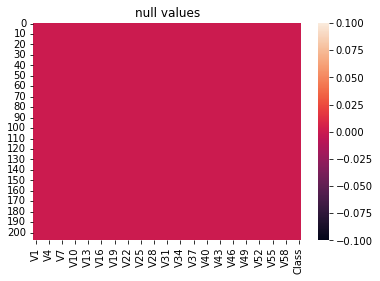

In [13]:
# Now Plotting Heat Map

sns.heatmap(df.isnull())
plt.title("null values")
plt.show

In [14]:
df.rename(columns = {'Class':'Rock & Mine'}, inplace = True)

In [15]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Rock & Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [16]:
df['Rock & Mine'].value_counts()      # Check the Value counts in each Class

Mine    111
Rock     97
Name: Rock & Mine, dtype: int64

# Label Encoder = => Alphabetical Order

In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Rock & Mine']=LE.fit_transform(df['Rock & Mine'])
df['Rock & Mine'].value_counts()

0    111
1     97
Name: Rock & Mine, dtype: int64

In [18]:
LE.inverse_transform([1,0])  # To check whether which particular class has been assigned to '0' and '1'

array(['Rock', 'Mine'], dtype=object)

In [19]:
df['Rock & Mine'].value_counts()

0    111
1     97
Name: Rock & Mine, dtype: int64

# Checking Correlation----> # To check correlation between each values.

In [20]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Rock & Mine
V1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
V2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
V3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
V4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
V5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
V6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158,-0.132327
V7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493,-0.114748
V8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216,-0.189314
V9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243,-0.321448
V10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,-0.341142


In [21]:
# Plotting heatmap of this particular Correlation

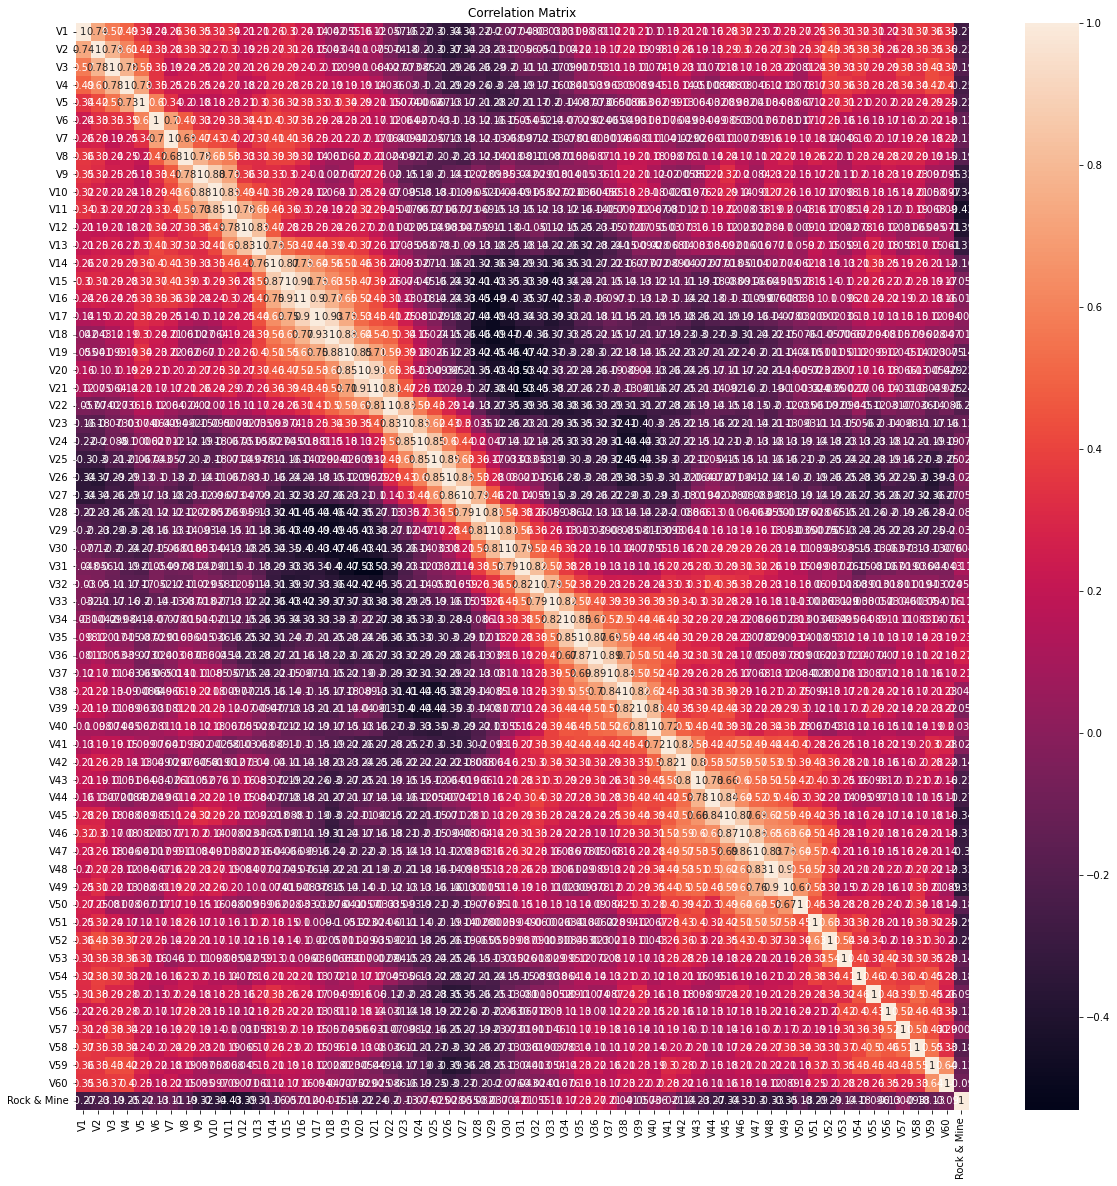

In [22]:
corr_mat=df.corr()
# Size of the canvas

plt.figure(figsize=[20,20])

#plot the correlation matrix now
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() 

In [23]:
corr_matrix = df.corr()        # It will give us the DataFrame of correlation matrix 
corr_matrix

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Rock & Mine
V1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
V2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
V3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
V4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
V5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
V6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158,-0.132327
V7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493,-0.114748
V8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216,-0.189314
V9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243,-0.321448
V10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,-0.341142


In [24]:
type(corr_matrix)    # To check the type of the correlation matrix dataframe

pandas.core.frame.DataFrame

In [25]:
corr_matrix = df.corr()
corr_matrix["Rock & Mine"].sort_values(ascending=False)

Rock & Mine    1.000000
V36            0.269151
V35            0.227670
V37            0.209055
V34            0.172010
V31            0.110728
V33            0.107184
V32            0.055275
V38            0.040527
V40            0.035928
V17            0.003969
V57           -0.000933
V30           -0.004219
V16           -0.011581
V18           -0.014612
V41           -0.020942
V25           -0.025306
V26           -0.028063
V29           -0.036639
V27           -0.054997
V39           -0.056910
V15           -0.057318
V24           -0.074041
V28           -0.082486
V60           -0.090055
V55           -0.095639
V7            -0.114748
V23           -0.127413
V56           -0.129341
V59           -0.130826
V6            -0.132327
V19           -0.138204
V53           -0.141871
V42           -0.144147
V14           -0.157277
V50           -0.180224
V54           -0.182687
V58           -0.184191
V8            -0.189314
V3            -0.192195
V22           -0.201361
V5            -0

# Let's Check the data distribution among all the columns

AttributeError: 'Line2D' object has no property 'layot'

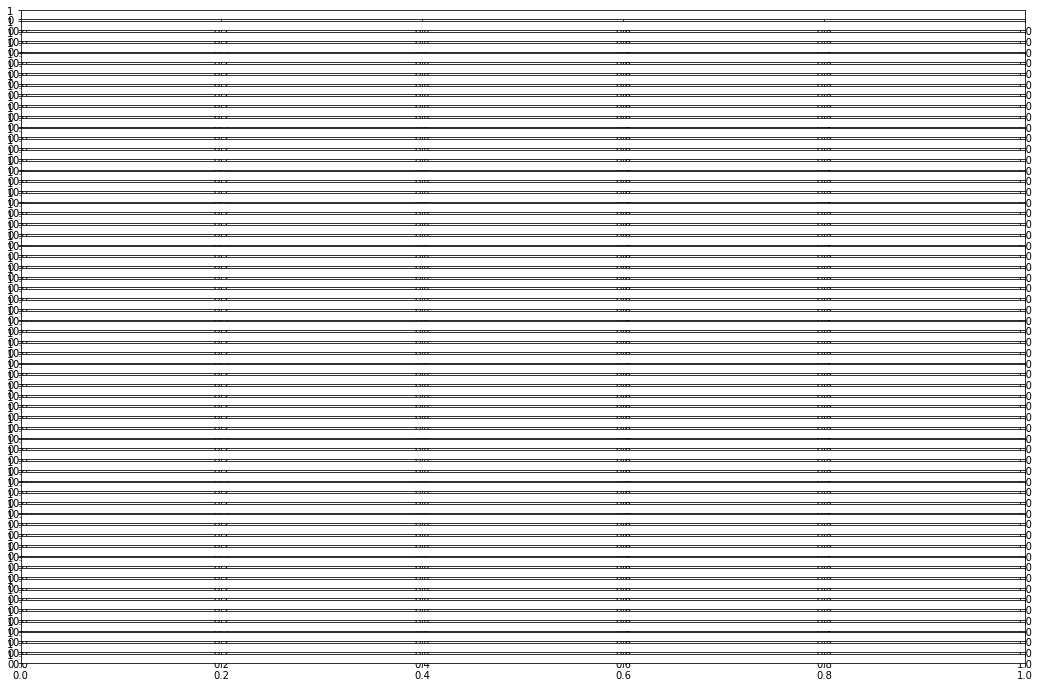

In [29]:
df.plot(kind='density', subplots=True, Layot=(6,11), sharex=False, Legend=False, fontsize=1, figsize=(18,12))

# Splitting the independent and target variables in x and y before removing the skewness

In [32]:
x = df.drop("Rock & Mine", axis=1)
y = df["Rock & Mine"]

In [31]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040


In [33]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

# Checking Skewness 

In [35]:
x.skew().sort_values(ascending=False)

V4     3.401697
V60    2.775754
V51    2.716060
V3     2.652518
V2     2.155644
V1     2.131088
V58    2.098330
V52    2.093976
V5     2.018141
V47    1.790155
V55    1.789946
V56    1.780805
V50    1.761714
V59    1.737506
V46    1.706674
V57    1.653090
V9     1.633870
V8     1.481107
V45    1.366839
V10    1.281258
V48    1.277722
V49    1.273385
V6     1.248166
V44    1.235086
V54    1.093090
V53    1.060572
V38    1.033366
V14    1.022369
V11    0.987813
V7     0.970820
V43    0.909317
V39    0.908835
V41    0.863526
V40    0.861280
V42    0.860110
V15    0.763964
V13    0.736584
V16    0.694671
V37    0.676994
V17    0.654480
V36    0.619868
V35    0.591654
V12    0.588681
V34    0.563296
V18    0.525845
V33    0.423864
V32    0.313420
V19    0.283182
V31    0.259797
V20   -0.085331
V30   -0.132390
V21   -0.252741
V22   -0.392289
V29   -0.442007
V23   -0.594350
V28   -0.615447
V27   -0.627843
V26   -0.671580
V24   -0.691861
V25   -0.788909
dtype: float64

# Here we can see skewness in most of the columns of our dataset. we will remove the skewness Using Power_Transform Function

In [39]:
from sklearn.preprocessing import power_transform

In [40]:
x_new=power_transform(x)

In [41]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040


In [42]:
type(x_new)

numpy.ndarray

In [45]:
x=pd.DataFrame(x_new, columns=x.columns)

In [46]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60'],
      dtype='object')

In [47]:
x.skew().sort_values(ascending=False)       # checking whether skewness has been removed or not.

V58    0.220689
V60    0.204745
V1     0.200661
V57    0.200251
V2     0.196446
V4     0.190002
V55    0.189057
V3     0.187103
V45    0.170784
V46    0.169289
V59    0.166418
V52    0.148282
V5     0.140451
V49    0.132635
V53    0.130364
V54    0.125757
V17    0.124196
V47    0.120549
V56    0.120513
V50    0.106623
V16    0.102740
V37    0.100569
V48    0.096302
V18    0.094088
V36    0.087954
V38    0.086653
V44    0.083057
V39    0.078671
V35    0.078044
V9     0.077245
V51    0.077191
V10    0.073024
V15    0.070344
V41    0.061931
V42    0.049309
V34    0.047734
V11    0.047685
V8     0.039388
V14    0.039062
V6     0.038764
V40    0.035032
V12    0.033161
V43    0.032043
V13    0.024720
V33    0.020193
V19    0.019011
V7     0.017842
V32    0.005106
V31   -0.001851
V30   -0.047004
V20   -0.074176
V21   -0.106673
V29   -0.133525
V22   -0.144238
V24   -0.163443
V28   -0.167409
V23   -0.180086
V27   -0.195002
V26   -0.202206
V25   -0.205760
dtype: float64

In [48]:
sk=x.skew()  # Assigning new value 'sk' for crosscheck the skewness

In [49]:
sk

V1     0.200661
V2     0.196446
V3     0.187103
V4     0.190002
V5     0.140451
V6     0.038764
V7     0.017842
V8     0.039388
V9     0.077245
V10    0.073024
V11    0.047685
V12    0.033161
V13    0.024720
V14    0.039062
V15    0.070344
V16    0.102740
V17    0.124196
V18    0.094088
V19    0.019011
V20   -0.074176
V21   -0.106673
V22   -0.144238
V23   -0.180086
V24   -0.163443
V25   -0.205760
V26   -0.202206
V27   -0.195002
V28   -0.167409
V29   -0.133525
V30   -0.047004
V31   -0.001851
V32    0.005106
V33    0.020193
V34    0.047734
V35    0.078044
V36    0.087954
V37    0.100569
V38    0.086653
V39    0.078671
V40    0.035032
V41    0.061931
V42    0.049309
V43    0.032043
V44    0.083057
V45    0.170784
V46    0.169289
V47    0.120549
V48    0.096302
V49    0.132635
V50    0.106623
V51    0.077191
V52    0.148282
V53    0.130364
V54    0.125757
V55    0.189057
V56    0.120513
V57    0.200251
V58    0.220689
V59    0.166418
V60    0.204745
dtype: float64

In [52]:
sk[np.abs(sk)>0.25].all()      # np.abs------->Provide us the mod of anyvalue that is passed in

True

In [53]:
sk

V1     0.200661
V2     0.196446
V3     0.187103
V4     0.190002
V5     0.140451
V6     0.038764
V7     0.017842
V8     0.039388
V9     0.077245
V10    0.073024
V11    0.047685
V12    0.033161
V13    0.024720
V14    0.039062
V15    0.070344
V16    0.102740
V17    0.124196
V18    0.094088
V19    0.019011
V20   -0.074176
V21   -0.106673
V22   -0.144238
V23   -0.180086
V24   -0.163443
V25   -0.205760
V26   -0.202206
V27   -0.195002
V28   -0.167409
V29   -0.133525
V30   -0.047004
V31   -0.001851
V32    0.005106
V33    0.020193
V34    0.047734
V35    0.078044
V36    0.087954
V37    0.100569
V38    0.086653
V39    0.078671
V40    0.035032
V41    0.061931
V42    0.049309
V43    0.032043
V44    0.083057
V45    0.170784
V46    0.169289
V47    0.120549
V48    0.096302
V49    0.132635
V50    0.106623
V51    0.077191
V52    0.148282
V53    0.130364
V54    0.125757
V55    0.189057
V56    0.120513
V57    0.200251
V58    0.220689
V59    0.166418
V60    0.204745
dtype: float64

Skewness has been removed, Now we can proceed with the further steps.

#  Checking Outliers

There are 61 clumns in dataset so, it's not possible to plot each and every columns separately or plot all together also.
so, we will do it in 2 steps.

<function matplotlib.pyplot.show(close=None, block=None)>

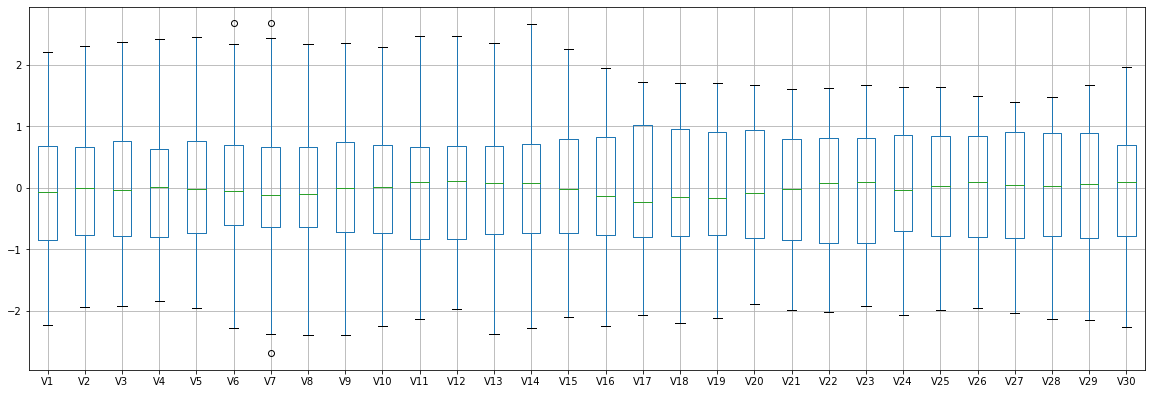

In [55]:
# plotting Boxplots for first 30 columns

x.iloc[:,0:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

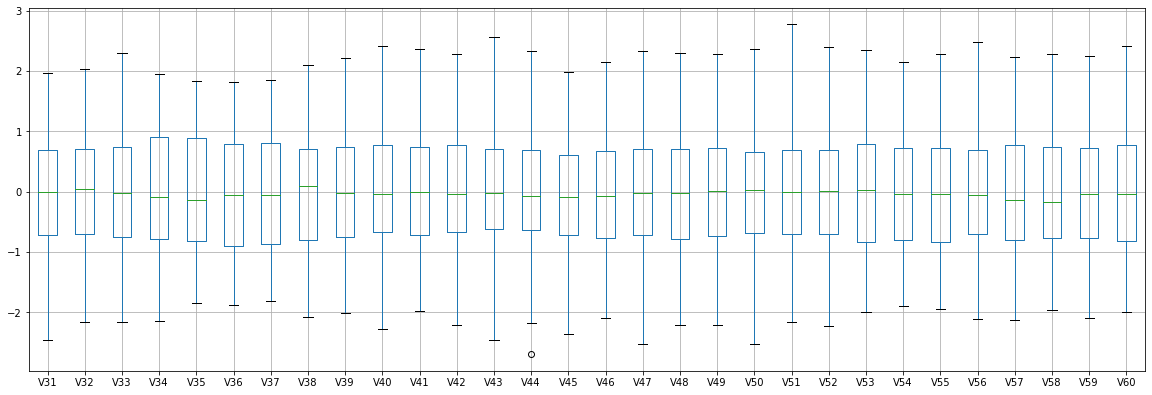

In [57]:
# Plotting Boxplots for next 30 columns

x.iloc[:,30:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

# Let's Quantify the Data

Here we will use zscore for Quantify the data,------> Zscore will convert all the -ve Values to +ve Values.

In [58]:
from scipy.stats import zscore

In [59]:
(np.abs(zscore(x))<3).all()

V1     True
V2     True
V3     True
V4     True
V5     True
V6     True
V7     True
V8     True
V9     True
V10    True
V11    True
V12    True
V13    True
V14    True
V15    True
V16    True
V17    True
V18    True
V19    True
V20    True
V21    True
V22    True
V23    True
V24    True
V25    True
V26    True
V27    True
V28    True
V29    True
V30    True
V31    True
V32    True
V33    True
V34    True
V35    True
V36    True
V37    True
V38    True
V39    True
V40    True
V41    True
V42    True
V43    True
V44    True
V45    True
V46    True
V47    True
V48    True
V49    True
V50    True
V51    True
V52    True
V53    True
V54    True
V55    True
V56    True
V57    True
V58    True
V59    True
V60    True
dtype: bool

In [60]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,-0.275592,0.270400,0.291419,-0.982829,0.680848,0.077254,0.667974,0.554828,1.261778,0.262281,...,0.886822,-1.714520,-0.540200,0.882627,-0.107066,1.499641,1.633890,0.400350,0.502761,-0.776736
1,1.093320,0.801622,1.347540,0.735530,1.048217,2.028301,1.450303,1.955298,1.382871,0.814053,...,-0.168191,-0.487283,-0.088541,-0.924571,0.312654,1.715447,1.265764,-0.397173,-0.337201,-0.334828
2,0.164352,0.967858,1.706388,1.454208,0.716427,1.788322,1.731436,2.076448,2.145065,2.108350,...,-1.528076,1.260374,0.989360,-0.005498,1.376513,2.058982,2.181153,1.455415,0.591789,0.612764
3,-1.191697,-0.733065,0.883488,-0.992975,-1.359821,-1.413729,-0.057137,0.135456,-1.320846,-0.563375,...,0.956393,0.107221,-1.181021,0.778028,0.150290,0.047176,-0.399785,-0.535400,-0.674439,1.306602
4,1.812744,1.173239,0.473188,-0.161826,-0.112767,-0.657618,0.140947,1.367785,1.492734,1.594884,...,0.186054,-1.613589,-0.770133,0.157606,0.572627,-1.670035,0.159755,-0.424272,0.788511,0.938201
5,0.313183,0.577108,-0.332567,-1.154405,-0.715843,0.085019,0.127045,0.811015,0.564173,0.916725,...,-0.434988,-1.279376,-1.748084,-1.157504,-1.705676,0.385757,-0.207725,-1.060176,-0.363811,0.216149
6,0.489780,1.670269,1.913789,1.803770,1.603895,1.200339,-0.799864,0.305904,0.545182,1.178557,...,0.572599,1.012425,1.703532,0.537056,-0.149222,1.170870,0.568837,1.253142,-0.795986,1.094907
7,1.307376,0.874461,1.345806,-0.462640,1.012097,-0.049838,-0.189918,-1.007947,-0.074668,0.792420,...,-1.203592,-0.541681,0.406024,-0.992924,0.732132,0.538022,0.435180,-0.451642,-0.445226,-0.043992
8,-0.102415,0.286574,0.482970,0.126131,0.032164,-0.801899,-0.751173,-2.273240,-1.171763,-0.319532,...,-1.058536,0.426599,0.519375,0.717344,-0.417656,-0.558997,-0.004642,0.564545,-0.158074,-1.198774
9,-0.572875,-0.720846,-0.022075,-1.757770,-1.431785,-0.604371,-0.135093,-0.837016,-0.731982,-1.993809,...,-0.254587,-0.381457,1.521438,1.095206,0.131479,-0.068773,-0.962794,-0.802172,-0.233338,-0.474882


In [61]:
sk

V1     0.200661
V2     0.196446
V3     0.187103
V4     0.190002
V5     0.140451
V6     0.038764
V7     0.017842
V8     0.039388
V9     0.077245
V10    0.073024
V11    0.047685
V12    0.033161
V13    0.024720
V14    0.039062
V15    0.070344
V16    0.102740
V17    0.124196
V18    0.094088
V19    0.019011
V20   -0.074176
V21   -0.106673
V22   -0.144238
V23   -0.180086
V24   -0.163443
V25   -0.205760
V26   -0.202206
V27   -0.195002
V28   -0.167409
V29   -0.133525
V30   -0.047004
V31   -0.001851
V32    0.005106
V33    0.020193
V34    0.047734
V35    0.078044
V36    0.087954
V37    0.100569
V38    0.086653
V39    0.078671
V40    0.035032
V41    0.061931
V42    0.049309
V43    0.032043
V44    0.083057
V45    0.170784
V46    0.169289
V47    0.120549
V48    0.096302
V49    0.132635
V50    0.106623
V51    0.077191
V52    0.148282
V53    0.130364
V54    0.125757
V55    0.189057
V56    0.120513
V57    0.200251
V58    0.220689
V59    0.166418
V60    0.204745
dtype: float64

# Complete Workflow of my DataSet

> Imported the Libraries

> Loaded the Dataset

> Data Visualization
> Categorical--->Histogram ====> Frequency of the classes
> Continuous ----> Density plot =====> Density of the Data Distribution
> I found that My Data was BALANCED ------> The frequency of the classes were almost equal.

> I Divided my data into ----> Independent variable(x) and Dependent Variable(y)

> x----> contains only continuous data=====> Skewness of the data======> Here I found the SKEWNESS

> y----> contains Categorical data ("Classes")====> I Encoded this Variable

> I Removed the Skewness by Using the "TRANSFORMATION TECHNIQUES"

> X=====> I used Power tranformation------> Skewness was Removed from the Data,---> Now X does not have any Skewness.

> y====> I Encoded the dependent Variable data

> Check the Data for OUTLIERS====> I use "zscore".

> After calculated the zscore, none of the data points was found which had zscore out of the range [-3,3]====> This is the Rule of Thumb======> Only be calculated for the numerical Data ("Data Should be in Continuous Form)

> Skewness, zscore for Categorical data------> THIS IS INVALID OPERATION----> Bcauz we can't find out the Mean of "Rock & Mine"

NOW, MY DATA IS READY FOR TRAINING PROCESS.

# THANK YOU :-)